<a href="https://colab.research.google.com/github/Sameer8095/Hotel-booking-data-analysis/blob/main/Copy_of_Hotel_Booking_Analysis1_team_data_science_learners_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**INTRODUCTION**

This dataset contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Main aim of the project to is to understand and visualize the dataset from hotel and customer point of view.



*   **CHALLENGES**

     Understand the columns of the dataset.

     Analyze and visualization of questions.

     Find the right chart to show the chart.

     Difficulties in analysing and visualization.




Import python libraries

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
%matplotlib inline

In [3]:
#mounting the drive 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
# Reading the csv file 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of Hotel Bookings.csv")

In [6]:
# Take a look at dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
print(df.shape)

(119390, 32)


In [7]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

Data cleaning, we use column which are only required for data analysis. Now lets check how much data is missing in the given dataset

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We see that columns "children", "country", "agent", "company" have missing data but the columns "agent", "company" has the more missing data. As these columns are not relevant for our analysis so, we can delete them

In [12]:
#droping the agent and company coumns
df = df.drop(['agent','company'], axis=1)

The columns "children" and "country" have low missing data, we will remove the full row of missing data

In [13]:
#removing the row having missing data 
df = df.dropna(axis=0)

In [14]:
# lets check again the missing data 
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Adding the columns for data analysis

In [15]:
#adding children, adult and babies to get total guest
df['total_guests'] = df['children'] + df['adults'] + df['babies']
#adding week stays to get total stays 
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

Rename the column in dataframe for analysing data conviniently

In [17]:
#renaming the columns
df = df.rename(columns={'is_canceled':'canceled', 'arrival_date_year':'arriving_year', 'arrival_date_month':'arriving_month', 'arrival_date_week_number':'arriving_week',
                       'arrival_date_of_day_month':'arriving_date', 'is_repeated_guest':'repeated_guest'})

In [18]:
#getting the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   canceled                        118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arriving_year                   118898 non-null  int64  
 4   arriving_month                  118898 non-null  object 
 5   arriving_week                   118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

**Exploratory Analsis And Visualization**



1.   **Visualizing hotel wise yearly booking**




In [19]:
df['arriving_year'].value_counts()

2016    56435
2017    40604
2015    21859
Name: arriving_year, dtype: int64

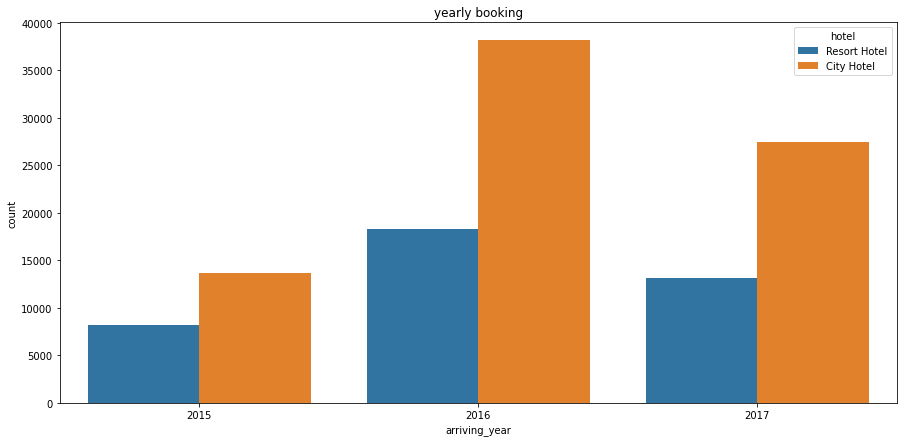

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'arriving_year',  data=df, hue = 'hotel')
plt.title('yearly booking')
plt.show()

INFERENCE: Booking across years is higher for city hotel compared to resort hotel and increases from year 2015 to 2016 and again decreases in 2017 compared to year 2016 

Now we want to know in which month people book the hotel 

In [24]:
df['arriving_month'].value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arriving_month, dtype: int64

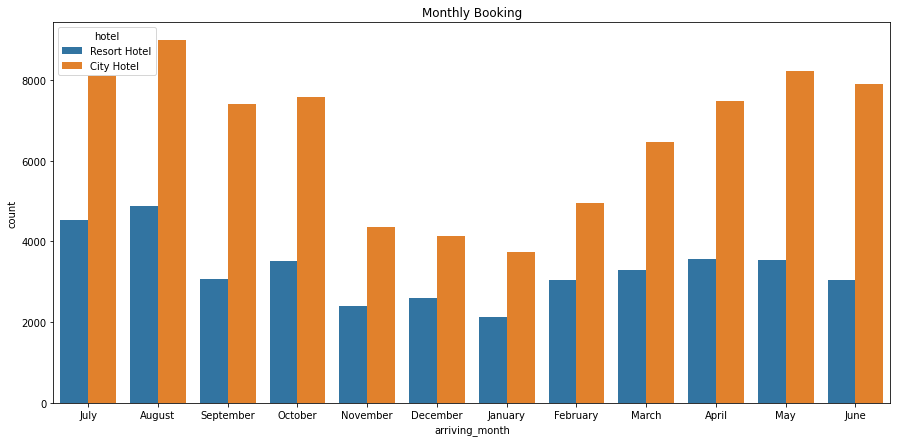

In [25]:
plt.figure(figsize=(15,7))
sns.countplot( x = 'arriving_month', hue = 'hotel', data = df)
plt.title('Monthly Booking')
plt.show()

INTERFERENCE: Booking across months is higher for city hotels compared to resort hotel, booking increases in monsoon and summer seasons and decreases in winter season.


2.   **Correlation Between The Numerical Data**



In [28]:
num_df = df[['lead_time', 'total_guests', 'repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
             'required_car_parking_spaces', 'total_of_special_requests']]

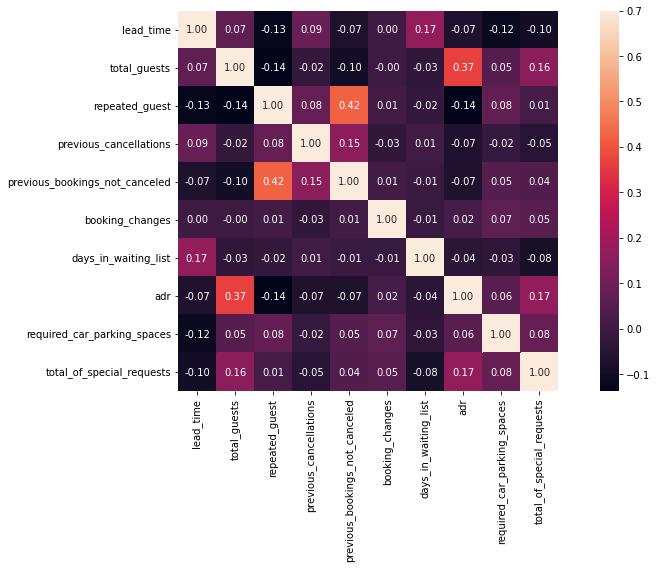

In [29]:
#correlating matrix
corrmat = num_df.corr()
f, a = plt.subplots(figsize=(15,7))
sns.heatmap(corrmat, annot = True, fmt = '.2f', annot_kws={'size':10}, vmax=0.7, square= True ) 

1) Repeated guest is slightly correlated with Previous bookins not cancelled, this means Repeaed guests generally donnot cancel their previous bookings.

2)Total guests is slightly correlated with adr. Which means more number of guests means more revenue hence more adr. 